#***Machine Learning model development for prdiction of hole posistion and size in a homongenous material by its base frequencies and vice versa.***#

In [ ]:
'''
-->Continue from the second half of the code i.e. Prediction of X-Position, Y-Posistion, Radius from base frequencies.

-->Please ignore the first half of the code i.e from Import of important Libraries to Error Distribution.

-->Just saved for future usage and improve it.

'''

###**Import of important Libraries.**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

###**Loading the Dataset.**

In [ ]:
file_path = '/content/CFFF_1hole.txt'
data = pd.read_csv(file_path, sep="\s+", header=None)
data[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.096,0.135,0.057,13.656915,60.191419,100.061447,207.584605,287.142773,357.970692,412.151931,505.534399,583.787265,691.397315
1,0.352,0.057,0.035,16.976478,66.610139,100.601437,208.186869,278.468713,351.049326,412.286872,505.472832,561.600349,702.337260
2,0.174,0.131,0.051,15.352599,60.740723,101.635663,211.839547,286.013218,350.806507,406.289406,511.354166,559.979263,686.179520
3,0.076,0.092,0.042,14.625900,62.604918,100.426899,209.842626,285.406902,363.713261,415.980998,506.949499,574.404819,701.874788
4,0.212,0.084,0.033,16.211955,63.636631,100.620321,214.039412,284.755482,355.831711,411.818925,504.581927,568.769782,701.561577


In [ ]:
data.shape

(10000, 13)

In [ ]:
data = np.array(data)

X = data[:, 3:]  # base frequencies
y = data[:, 0:3]  # crack size and location

In [ ]:
X.shape

(10000, 10)

In [ ]:
y.shape

(10000, 3)

###**Training, Testing and Splitting of the dataset.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(5000, 10)

In [ ]:
X_test.shape

(5000, 10)

In [ ]:
y_train.shape

(5000, 3)

In [ ]:
y_test.shape

(5000, 3)

###**Neural Network implementation.**

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1024, activation='relu'),
    Dense(3, activation='linear')  # Output layer with 3 neurons for size and location
])

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
450/450 [==============================] - 6s 7ms/step - loss: 0.0017 - val_loss: 2.6040e-04
Epoch 2/100
450/450 [==============================] - 4s 8ms/step - loss: 3.7975e-04 - val_loss: 2.8352e-04
Epoch 3/100
450/450 [==============================] - 3s 8ms/step - loss: 2.9422e-04 - val_loss: 2.9598e-04
Epoch 4/100
450/450 [==============================] - 5s 10ms/step - loss: 2.1464e-04 - val_loss: 1.8581e-04
Epoch 5/100
450/450 [==============================] - 3s 7ms/step - loss: 2.0284e-04 - val_loss: 1.8626e-04
Epoch 6/100
450/450 [==============================] - 3s 7ms/step - loss: 2.0719e-04 - val_loss: 1.8101e-04
Epoch 7/100
450/450 [==============================] - 3s 7ms/step - loss: 1.6755e-04 - val_loss: 1.6561e-04
Epoch 8/100
450/450 [==============================] - 5s 12ms/step - loss: 1.6385e-04 - val_loss: 1.9416e-04
Epoch 9/100
450/450 [==============================] - 3s 7ms/step - loss: 1.6151e-04 - val_loss: 1.6997e-04
Epoch 10/100
450/450 

###**Evaluating the Test Loss.**

In [ ]:
print("Test Loss:", model.evaluate(X_test, y_test))

157/157 [==============================] - 0s 2ms/step - loss: 1.4285e-04
Test Loss: 0.0001428528194082901


#####**The test loss is 0.0001341857569059357. A low test loss indicates that our model is performing well on the test dataset.**

###**Model Evaluation and Analysis**

####**Visualize Predictions vs. True Values**

157/157 [==============================] - 0s 2ms/step


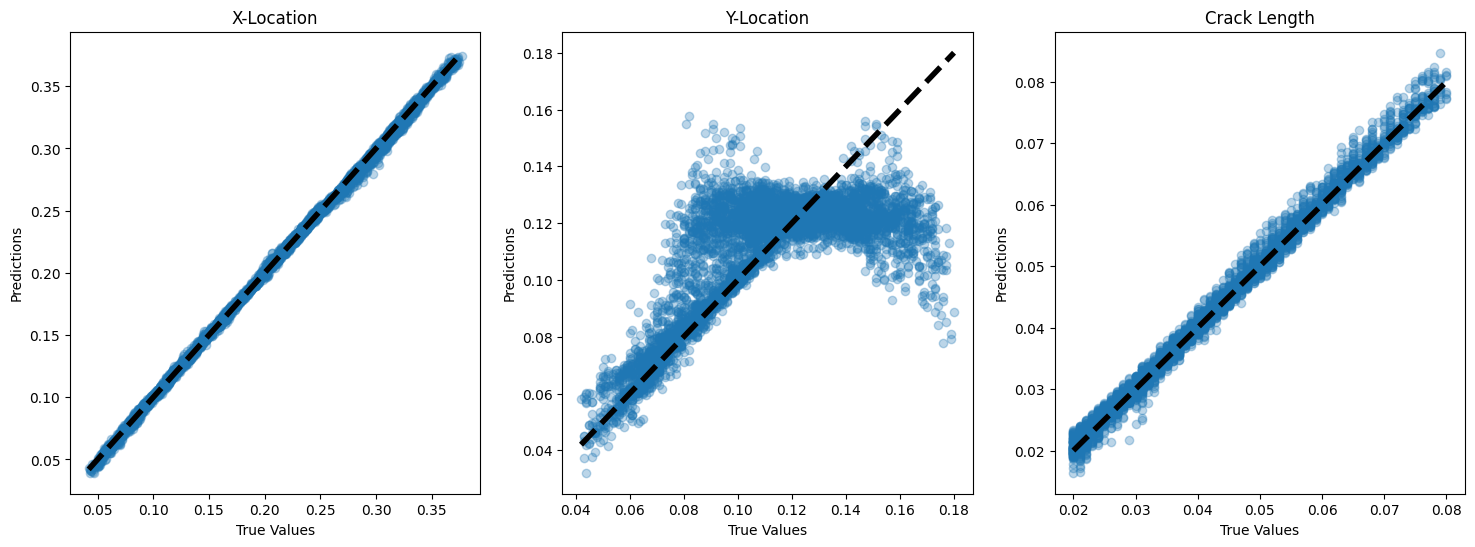

In [ ]:
# Assuming y_test and predictions are available
ypred = model.predict(X_test)

# Plotting each feature
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
titles = ['X-Location', 'Y-Location', 'Crack Length']
for i in range(3):
    ax[i].scatter(y_test[:, i], ypred[:, i], alpha=0.3)
    ax[i].plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], 'k--', lw=4)
    ax[i].set_xlabel('True Values')
    ax[i].set_ylabel('Predictions')
    ax[i].set_title(titles[i])
plt.show()

[0.332 0.107 0.04 ]
[0.33422852 0.13473696 0.0403245 ]


Text(0, 0.5, 'Y-coordinate')

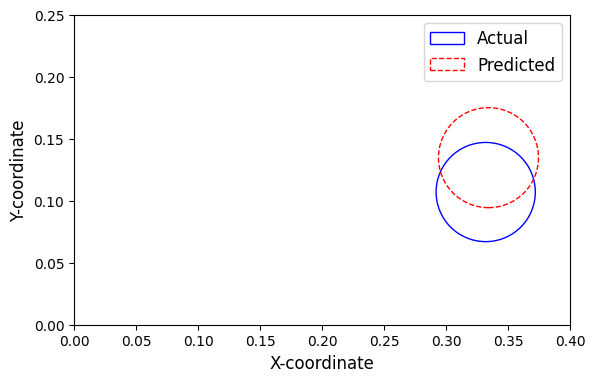

In [ ]:
t = 3456
print(y_test[t])
print(ypred[t])
font = 12
ax = plt.gca()
ax.cla() # clear things for fresh plot
# set the x and y limit
ax.set_xlim((0, 0.40))
ax.set_ylim((0, 0.25))
ax.set_aspect('equal', adjustable='box')  # Add this line to set equal aspect ratio
flaw1test = plt.Circle((y_test[t][0], y_test[t][1]), y_test[t][2], fill = False, edgecolor = 'b')
flaw1pred = plt.Circle((ypred[t][0], ypred[t][1]), ypred[t][2], fill = False, edgecolor = 'r', linestyle = '--')
ax.add_patch(flaw1test)
ax.add_patch(flaw1pred)
pyplot.plot([0, 0], [0, 0], 'bo-', markersize = 0.1, linewidth = 1.5)
pyplot.plot([0, 0], [0, 0], 'ro--', markersize = 0.1, linewidth = 1.5)
plt.legend(['Actual', 'Predicted'], loc='upper right',fontsize = font)
plt.xlabel("X-coordinate",fontsize = font)
plt.ylabel("Y-coordinate",fontsize = font)

####**Calculation of Error Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Print out MAE and R2 score for each output
for i in range(3):
    mae = mean_absolute_error(y_test[:, i], ypred[:, i])
    r2 = r2_score(y_test[:, i], ypred[:, i])
    print(f"{titles[i]} - MAE: {mae}, R-squared: {r2}")

X-Location - MAE: 0.001877587267291546, R-squared: 0.999138348579821
Y-Location - MAE: 0.014352110109090807, R-squared: 0.5296765507295973
Crack Length - MAE: 0.0009890629523158071, R-squared: 0.9921510109758177


#####**X-Location - MAE: 0.0027446268958002335, R-squared: 0.9984156494181936**
#####**Y-Location - MAE: 0.015201219946146012, R-squared: 0.5472197482118732**
#####**Crack Length - MAE: 0.0008430889575183391, R-squared: 0.9947789296628641**

###**Residuals Analysis**
######Analyzing the residuals (the difference between the predictions and the true values) can help identify patterns of errors and potential biases in the model.

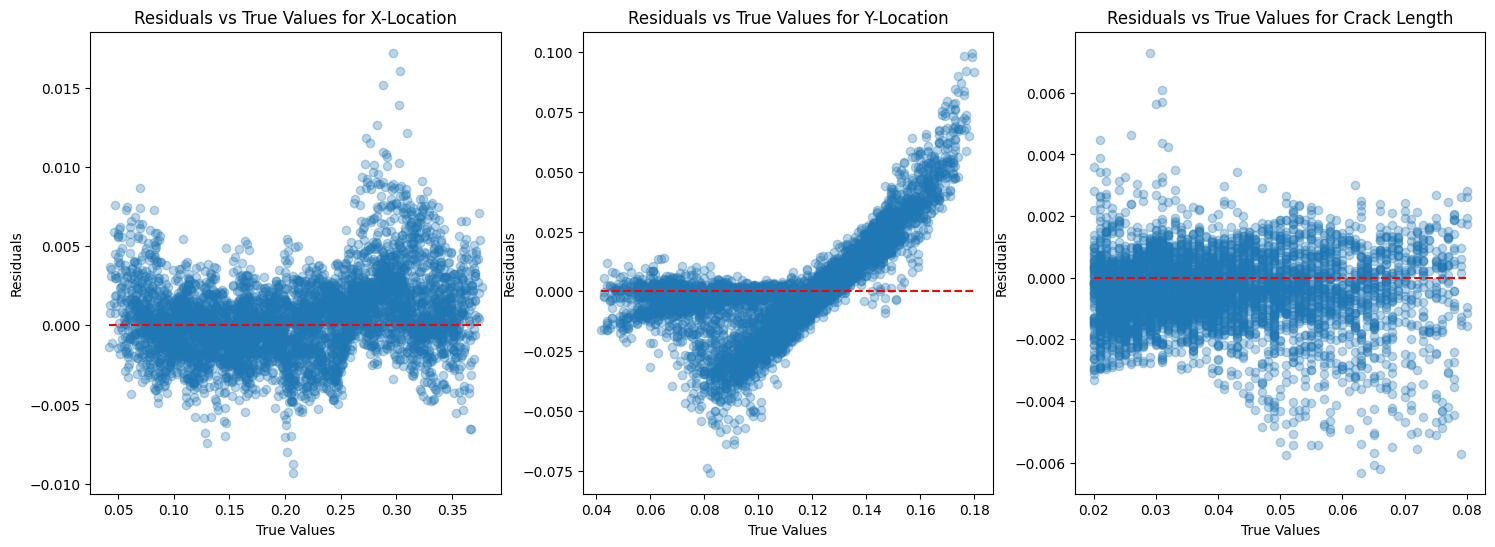

In [ ]:
# Residuals plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i in range(3):
    residuals = y_test[:, i] - ypred[:, i]
    ax[i].scatter(y_test[:, i], residuals, alpha=0.3)
    ax[i].set_xlabel('True Values')
    ax[i].set_ylabel('Residuals')
    ax[i].set_title(f'Residuals vs True Values for {titles[i]}')
    ax[i].hlines(y=0, xmin=y_test[:, i].min(), xmax=y_test[:, i].max(), colors='red', linestyles='--')
plt.show()

###**Error Distribution**
######Checking the distribution of errors to see if they're normally distributed, which is often an assumption of many regression models.

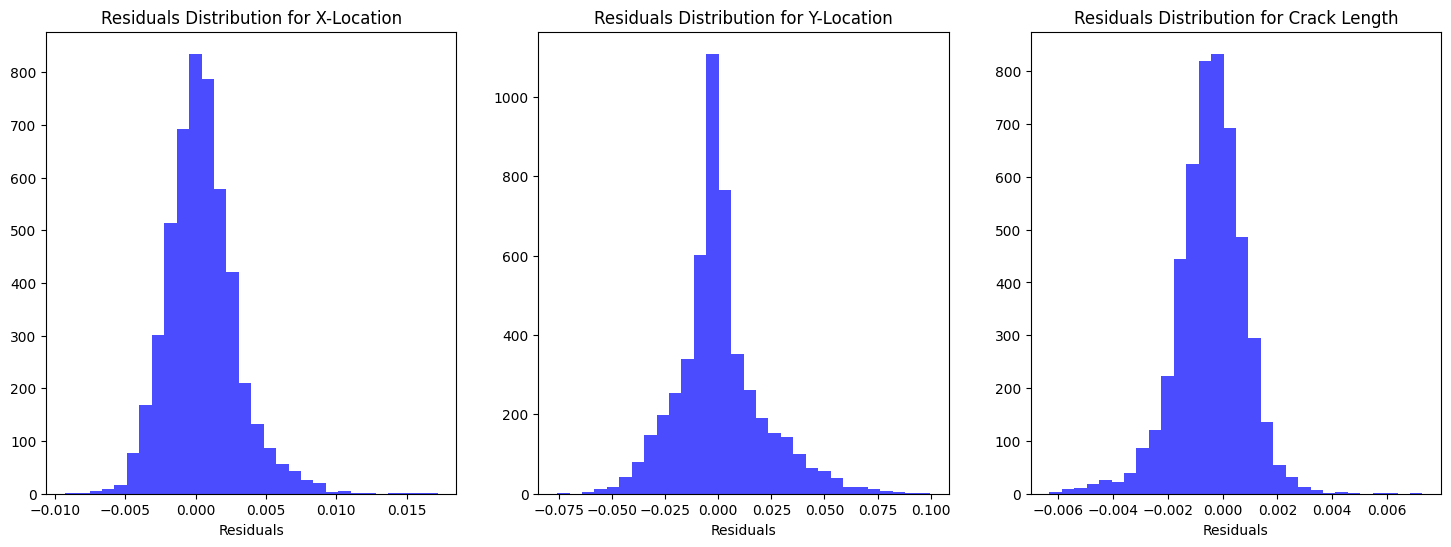

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i in range(3):
    residuals = y_test[:, i] - ypred[:, i]
    ax[i].hist(residuals, bins=30, alpha=0.7, color='blue')
    ax[i].set_xlabel('Residuals')
    ax[i].set_title(f'Residuals Distribution for {titles[i]}')
plt.show()

###**Prediction of X-Position, Y-Posistion, Radius from base frequencies.**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
url = '/content/CFFF_1hole.csv'  # dataset
data = pd.read_csv(url)

# Print column names to verify
print("Columns in the dataset:", data.columns)

# Use the correct column names in the DataFrame
X = data[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]
y = data[['X-Position', 'Y-Position', 'Radius']]

Columns in the dataset: Index(['X-Position', 'Y-Position', 'Radius', 'f1', 'f2', 'f3', 'f4', 'f5',
       'f6', 'f7', 'f8', 'f9', 'f10'],
      dtype='object')


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
import numpy as np
print(min(y['X-Position']),max(y['X-Position']))
print(min(y['Y-Position']),max(y['Y-Position']))
print(min(y['Radius']),max(y['Radius']))

0.041 0.379
0.042 0.18
0.02 0.08


In [21]:
X_train.shape

(5000, 10)

In [22]:
X_test.shape

(5000, 10)

In [23]:
y_train.shape

(5000, 3)

In [24]:
y_test.shape

(5000, 3)

In [25]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, r2_score

In [27]:
# Defining the model
model = Sequential([
    Dense(256, activation='relu', input_dim=10),
    Dense(128, activation='relu'),
    Dense(3)  # Output layer: 3 outputs for X-Position, Y-Position, Radius
])

In [28]:
# Compiling the model
model.compile(optimizer='adam', loss='mse')

In [29]:
#  Model Training
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 3.5216e-04
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 3.4499e-04 - val_loss: 3.0915e-04
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 3.8628e-04 - val_loss: 3.1769e-04
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 3.4595e-04 - val_loss: 2.8310e-04
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 2.4570e-04 - val_loss: 4.6169e-04
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 3.0586e-04 - val_loss: 2.9383e-04
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 3.2002e-04 - val_loss: 4.4483e-04
Epoch 8/100
141/141 [==============================] - 0s 3ms/step - loss: 2.8336e-04 - val_loss: 1.8616e-04
Epoch 9/100
141/141 [==============================] - 0s 3ms/step - loss: 2.1825e-04 - val_loss: 2.8372e-04
Epoch 10/100
141/141 [=

In [30]:
# Make predictions
y_pred = model.predict(X_test)

157/157 [==============================] - 0s 2ms/step


In [31]:
# Model evaluation
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

157/157 [==============================] - 0s 3ms/step - loss: 1.3983e-04
Test loss: 0.00013982840755488724


In [32]:
# MSE Evaluation
evaluation = model.evaluate(X_test, y_test)
print("Model evaluation (MSE):", evaluation)

157/157 [==============================] - 0s 3ms/step - loss: 1.3983e-04
Model evaluation (MSE): 0.00013982840755488724


In [46]:
# MAE and R2 scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE Score: {mae} ")
print(f"R-squared Score: {r2}")

MAE Score: 0.006039383273791314 
R-squared Score: 0.8456924416589117


In [35]:
import numpy as np

# Example input: Replace these values with the actual frequencies you want to use
new_input = np.array([[17.15063473, 65.64418655,	99.63610344,	204.76917842,	275.37193020,	339.41766692,	409.99916703,	504.38907925,	561.73883206,	697.38938024]])

# Remember to scale your input data as you did with your training data
new_input_scaled = scaler.transform(new_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Use the model to make predictions
predicted_output = model.predict(new_input_scaled)
print("The Predicted Output i.e. X-Position, Y-Posistion, Radius:", predicted_output)

# This will print the predicted X-Position, Y-Position, and Radius

1/1 [==============================] - 0s 22ms/step
The Predicted Output i.e. X-Position, Y-Posistion, Radius: [[0.34738582 0.07234036 0.03958325]]


In [37]:
# X_test = scaler.transform(X_test)
# We can use X_test directly for predictions

predicted_output = model.predict(X_test)  # Use the scaled test data directly

157/157 [==============================] - 0s 2ms/step


In [38]:
print("predicted_output shape:", predicted_output.shape)
print("y_test shape:", y_test.shape)

predicted_output shape: (5000, 3)
y_test shape: (5000, 3)


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0, 0.5, 'Predicted X-Position')

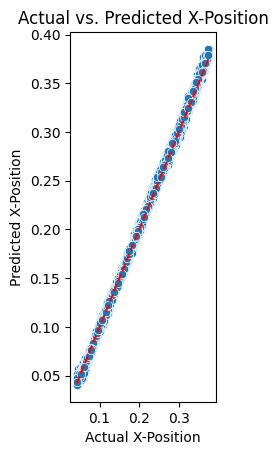

In [41]:
# Ploting X-Position
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test['X-Position'], y=predicted_output[:, 0])
plt.plot([y_test['X-Position'].min(), y_test['X-Position'].max()], [y_test['X-Position'].min(), y_test['X-Position'].max()], 'r--')
plt.title('Actual vs. Predicted X-Position')
plt.xlabel('Actual X-Position')
plt.ylabel('Predicted X-Position')

Text(0, 0.5, 'Predicted Y-Position')

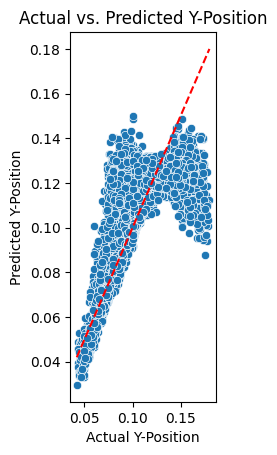

In [42]:
# Plot Y-Position
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test['Y-Position'], y=predicted_output[:, 1])
plt.plot([y_test['Y-Position'].min(), y_test['Y-Position'].max()], [y_test['Y-Position'].min(), y_test['Y-Position'].max()], 'r--')
plt.title('Actual vs. Predicted Y-Position')
plt.xlabel('Actual Y-Position')
plt.ylabel('Predicted Y-Position')

Text(0, 0.5, 'Predicted Radius')

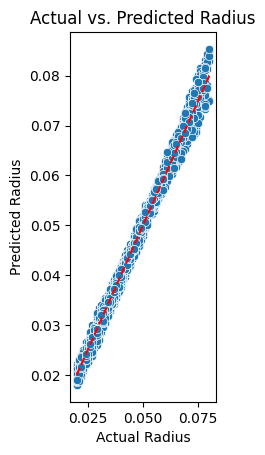

In [43]:
# Plot Radius
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test['Radius'], y=predicted_output[:, 2])
plt.plot([y_test['Radius'].min(), y_test['Radius'].max()], [y_test['Radius'].min(), y_test['Radius'].max()], 'r--')
plt.title('Actual vs. Predicted Radius')
plt.xlabel('Actual Radius')
plt.ylabel('Predicted Radius')

In [44]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>